<a href="https://colab.research.google.com/github/johnnyclayton/happiness_report/blob/main/Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Happiness Report 2022**

In [3]:
from google.colab import files
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import geopandas as gpd

In [35]:
uploaded = files.upload()

Saving 2022.csv to 2022.csv


In [49]:
data = pd.read_csv("/content/2022.csv")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world[world.name != "Antarctica"]
data.head(3)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191


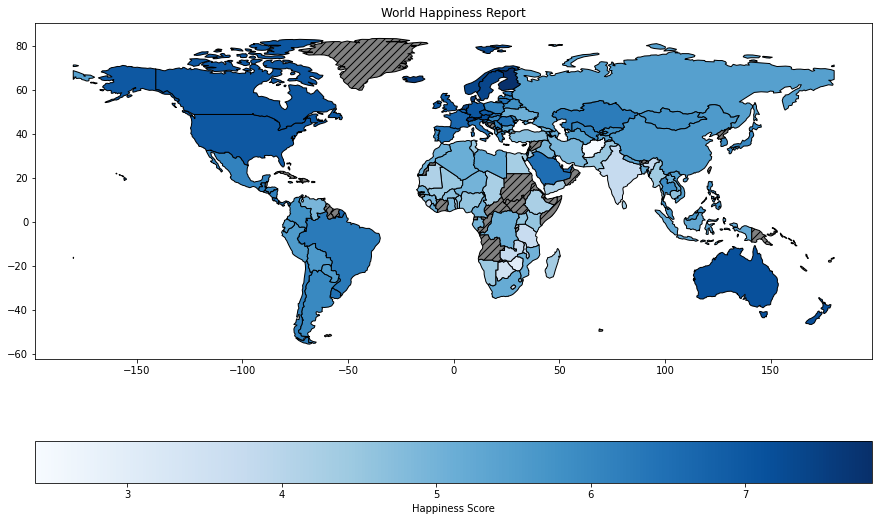

In [51]:
# merging the data with coordinates
world_happiness_final = world.merge(data, how="left", left_on=['name'], right_on=['Country'])
#plotting the map
world_happiness_final.plot("Happiness score", 
                           figsize=(15,10),
                           legend = True,
                           edgecolor = "black",
                           cmap = plt.cm.Blues,
                           legend_kwds = {"label":"Happiness Score", "orientation" : "horizontal"},

                           missing_kwds = {"color" : "gray", "hatch" : "///"})
plt.title("World Happiness Report");

<BarContainer object of 10 artists>

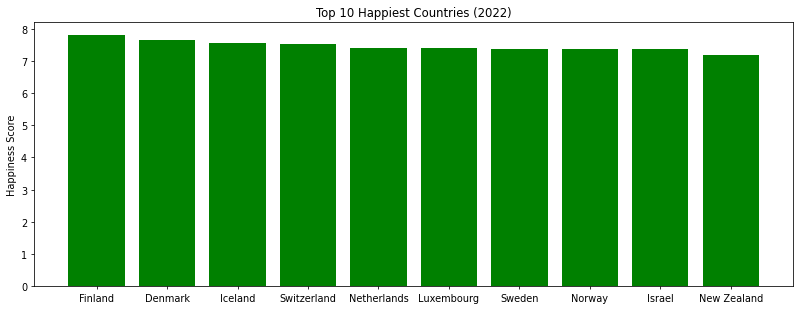

In [32]:
%matplotlib inline
interval = 10
figure(figsize=(14,5),dpi=70)
plt.title("Top 10 Happiest Countries (2022)")
plt.ylabel("Happiness Score")
score = data["Happiness score"].head(interval)
country = data["Country"].head(interval)
plt.bar(country,score,color="green")

In [ ]:
# Maximum GDP per capita
gdp_max = data['GDP per capita'].max()
data[data['GDP per capita'] == gdp_max]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
5,6,Luxembourg*,7.404,7.501,7.307,2.042,2.209,1.155,0.79,0.7,0.12,0.388


In [ ]:
# Minimum GDP per capita
gdp_min = data['GDP per capita'].min()
data[data['GDP per capita'] == gdp_min]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
107,108,Venezuela,4.925,5.051,4.8,2.79,0.0,0.968,0.578,0.283,0.225,0.082


In [ ]:
# Position of Brazil
data[data["Country"] == "Brazil"]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
37,38,Brazil,6.293,6.384,6.202,2.361,1.462,1.044,0.615,0.546,0.131,0.134


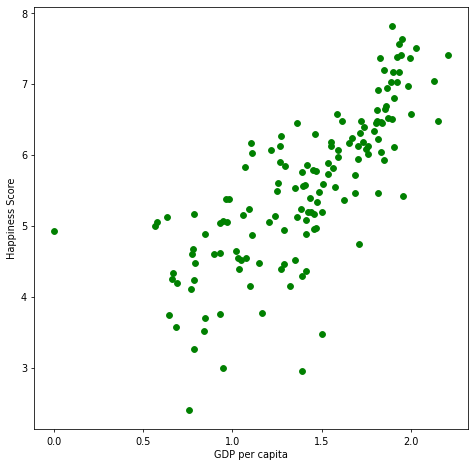

In [ ]:
%matplotlib inline

figure(figsize=(8,8),dpi=70)
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
score = data["Happiness score"]
gdp = data["GDP per capita"]
plt.scatter(gdp,score,color="green")

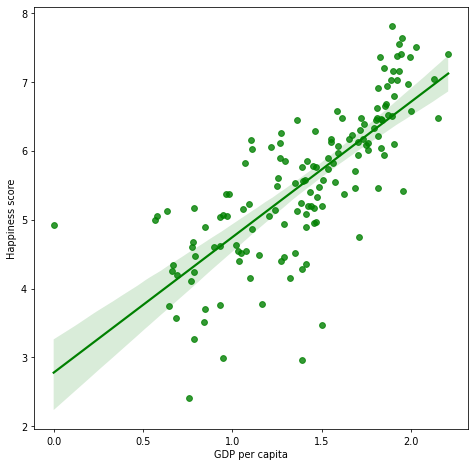

In [ ]:
figure(figsize=(8,8),dpi=70)
sns.regplot(x = 'GDP per capita',y = 'Happiness score', data = data,color="green")

In [ ]:
reg = linear_model.LinearRegression()
x = data[['GDP per capita']].values
y = data['Happiness score']
reg.fit(x,y)

LinearRegression()

In [ ]:
b0 = float(reg.intercept_)
b1 = float(reg.coef_)
r_squared = reg.score(x,y)

print(f"The regression line is: happiness = {round(b0,4)} + {round(b1,4)}*gdp per capita \nR2 is {round(r_squared,4)}")



The regression line is: happiness = 2.7773 + 1.9684*gdp per capita 
R2 is 0.5832
